In [1]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import DelegatesUtils
plt.style.use('bmh')
OUTPUTS_DIR = "./outputs/"

#Convolution scripts

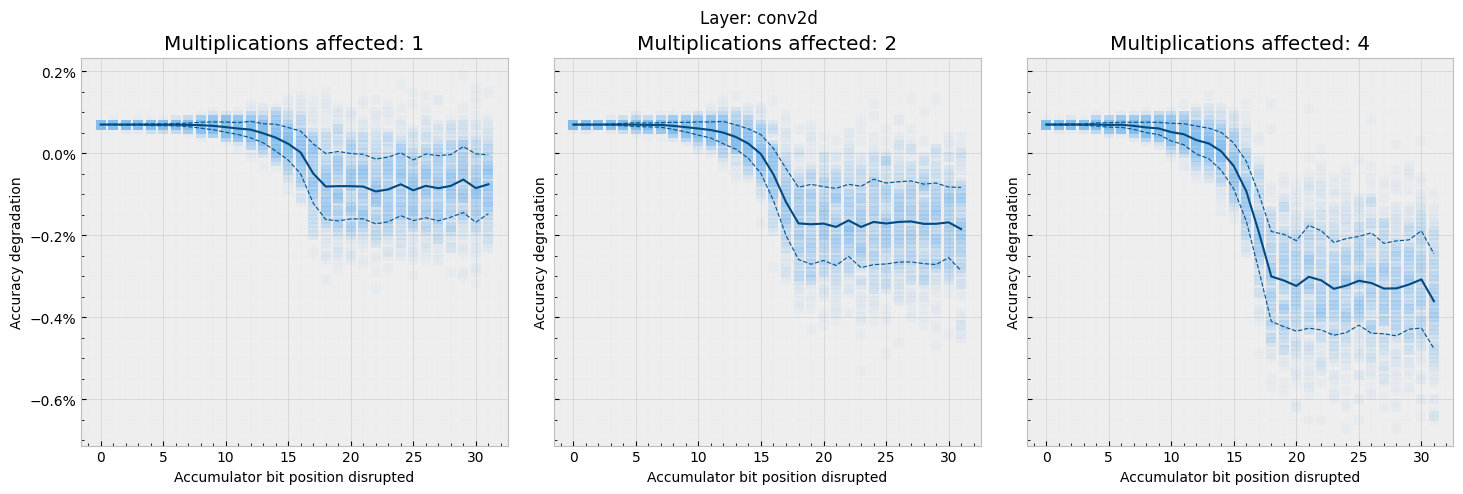

In [2]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d/"
LAYER = "conv2d/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.2, .4, .5, .8]
# yaxis_minor_locators = [4, 4, 4, 2]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

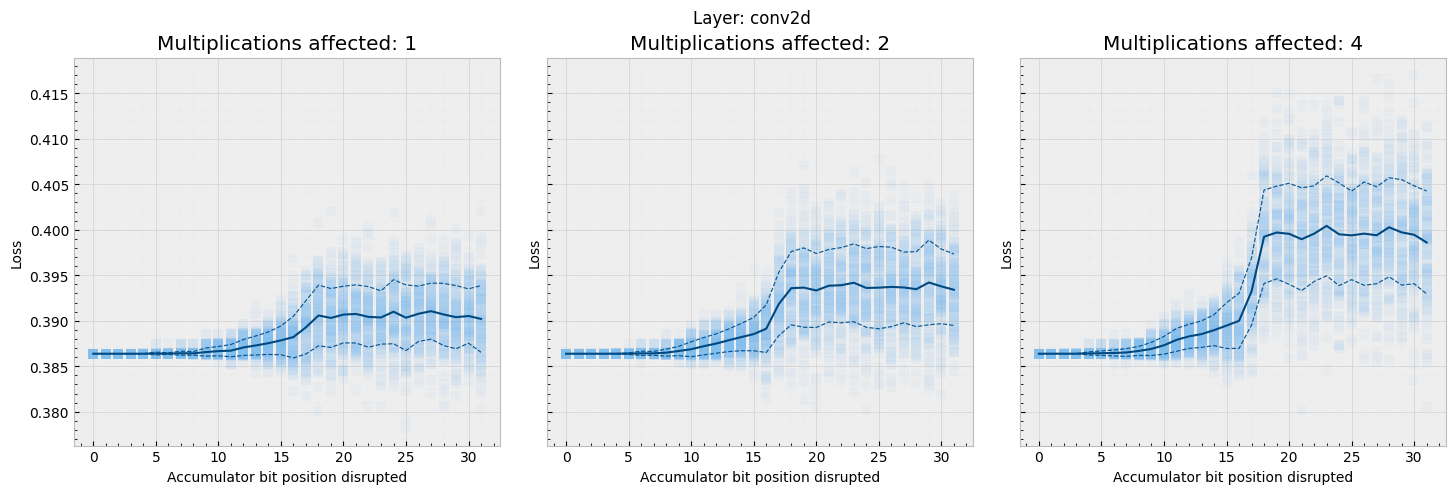

In [3]:
# Loss model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d/"
LAYER = "conv2d/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_loss_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)
decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.005, .01, .02, .02]
# yaxis_minor_locators = [2, 4, 4, 4]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_loss]), 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Loss')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_loss]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_loss]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

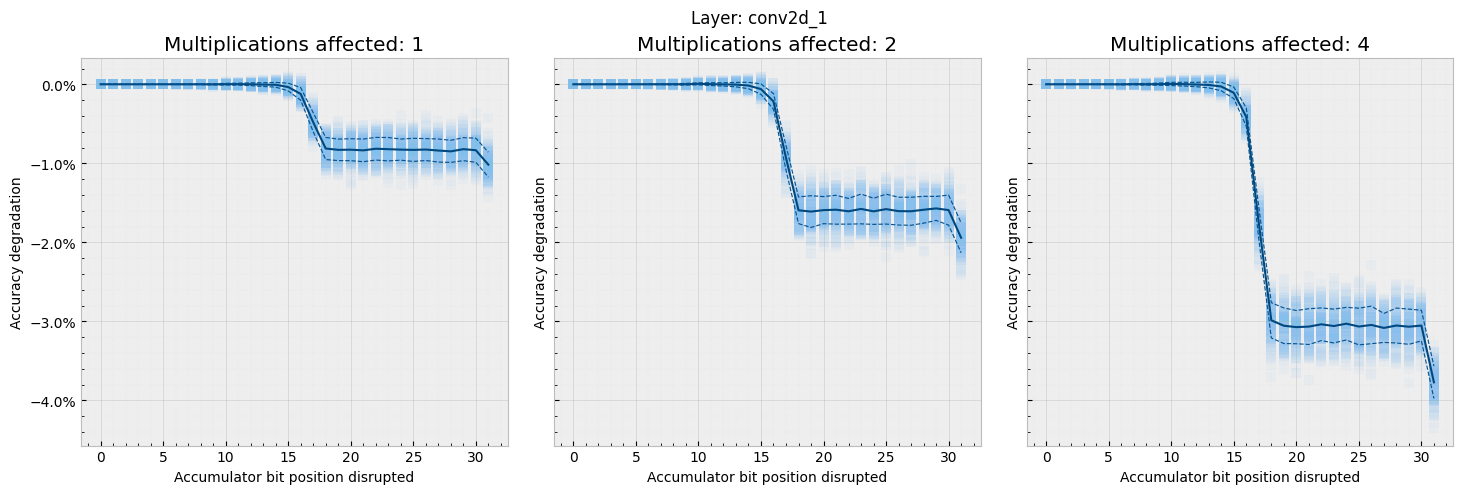

In [5]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_1/"
LAYER = "conv2d_1/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.2, .4, .5, .8]
# yaxis_minor_locators = [4, 4, 4, 2]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

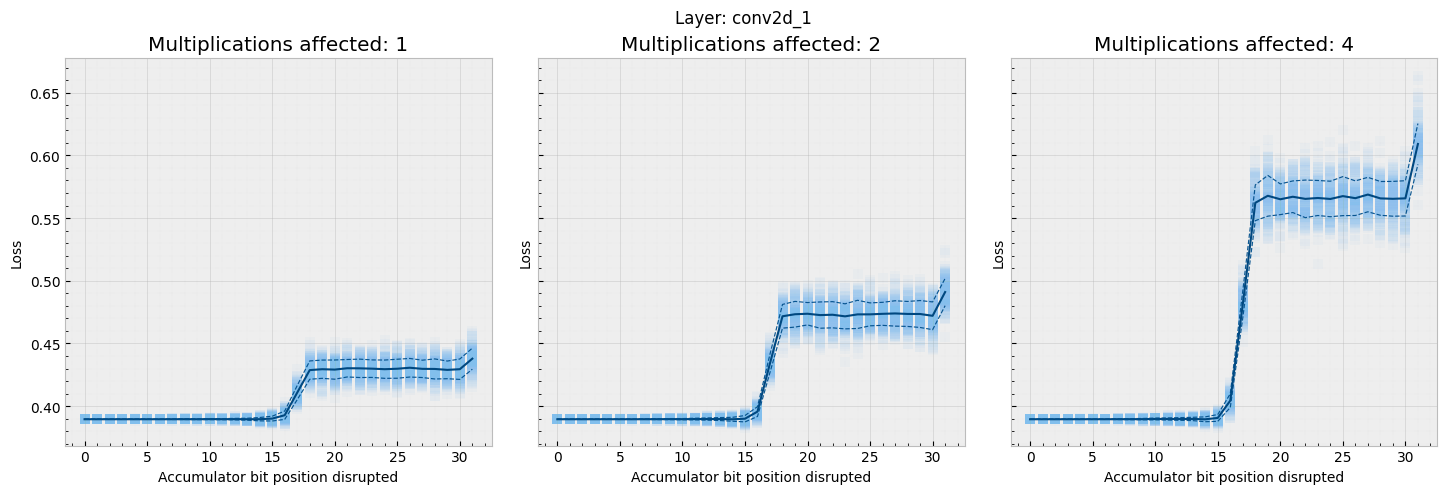

In [6]:
# Loss model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_1/"
LAYER = "conv2d_1/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_loss_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)
decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.005, .01, .02, .02]
# yaxis_minor_locators = [2, 4, 4, 4]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_loss]), 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Loss')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_loss]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_loss]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

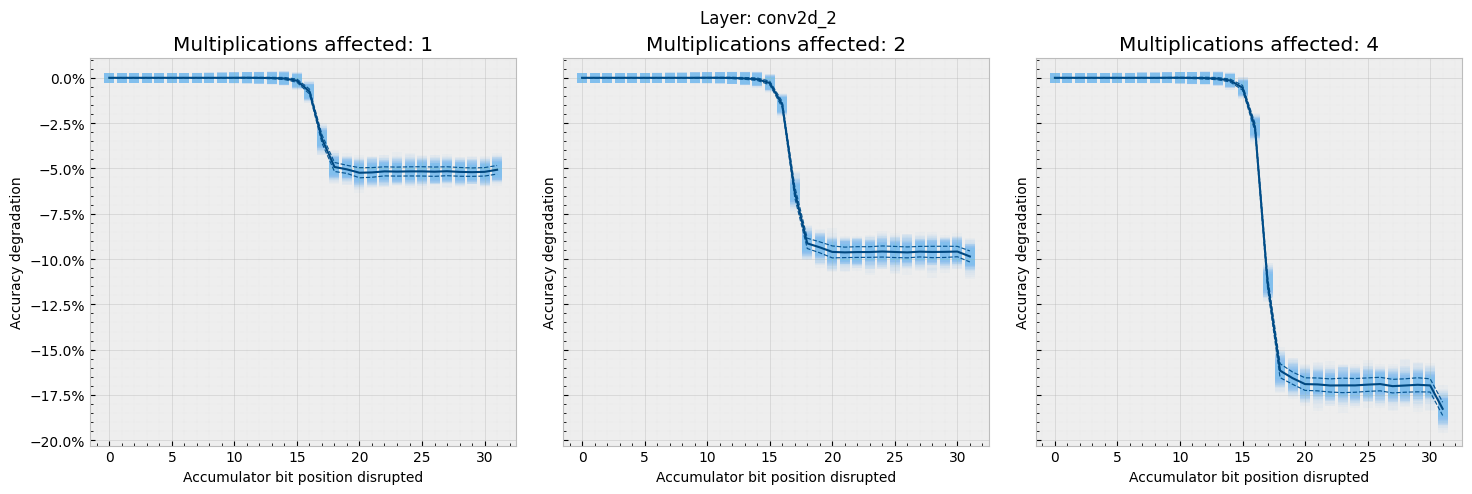

In [7]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_2/"
LAYER = "conv2d_2/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.2, .4, .5, .8]
# yaxis_minor_locators = [4, 4, 4, 2]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

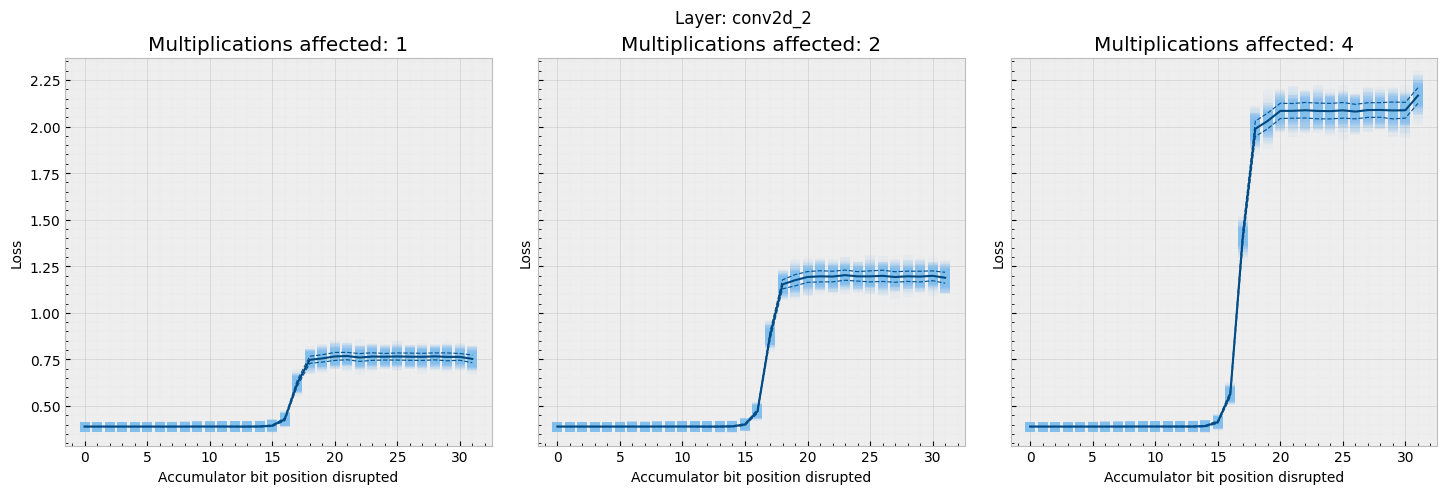

In [8]:
# Loss model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_2/"
LAYER = "conv2d_2/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_loss_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)
decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.005, .01, .02, .02]
# yaxis_minor_locators = [2, 4, 4, 4]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_loss]), 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Loss')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_loss]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_loss]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

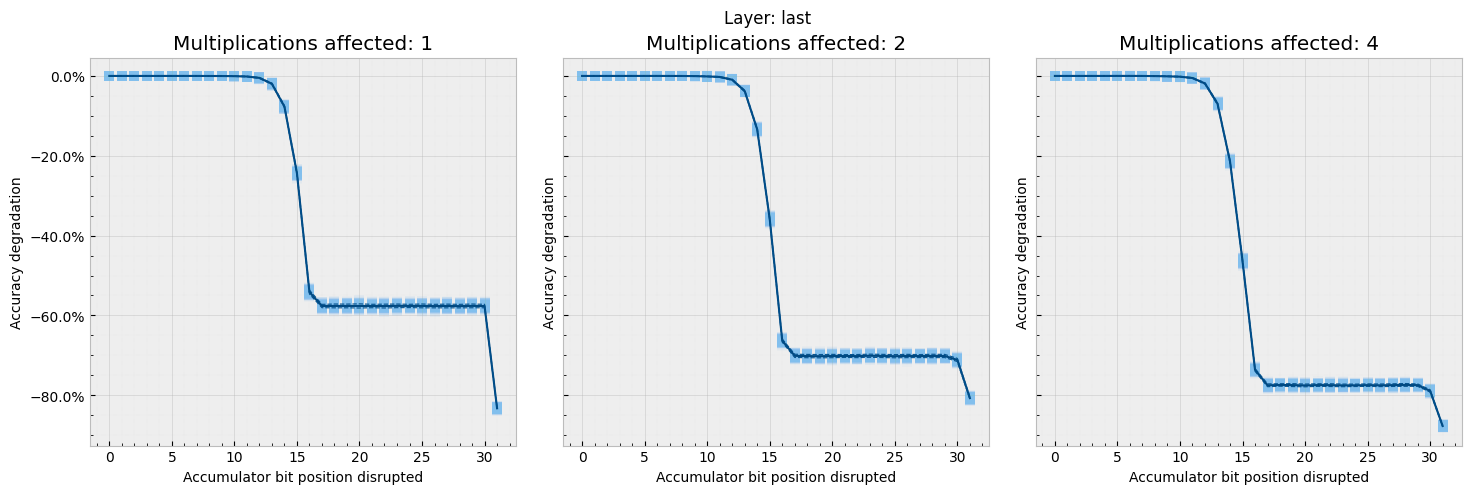

In [9]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "last/"
LAYER = "last/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.2, .4, .5, .8]
# yaxis_minor_locators = [4, 4, 4, 2]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

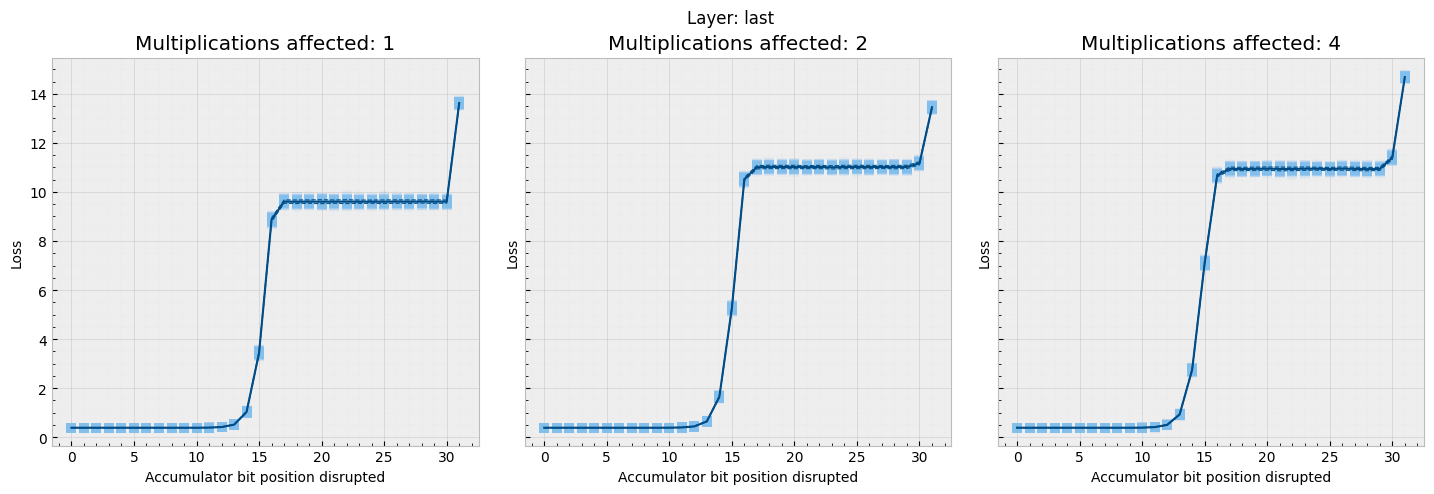

In [11]:
# Loss model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "last/"
LAYER = "last/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_conv_loss_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)
decimals = [1, 1, 1, 1]
# yaxis_major_locators = [.005, .01, .02, .02]
# yaxis_minor_locators = [2, 4, 4, 4]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_loss]), 
                       color = '#82BFED',
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.05, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Multiplications affected: ' + str(flip))
    ax[graph_pos].set_xlabel('Accumulator bit position disrupted')
    ax[graph_pos].set_ylabel('Loss')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_loss]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_loss]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages, alpha = 1.00, color = '#004880', linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds), '--', alpha = 0.95, color = '#004F8C', linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

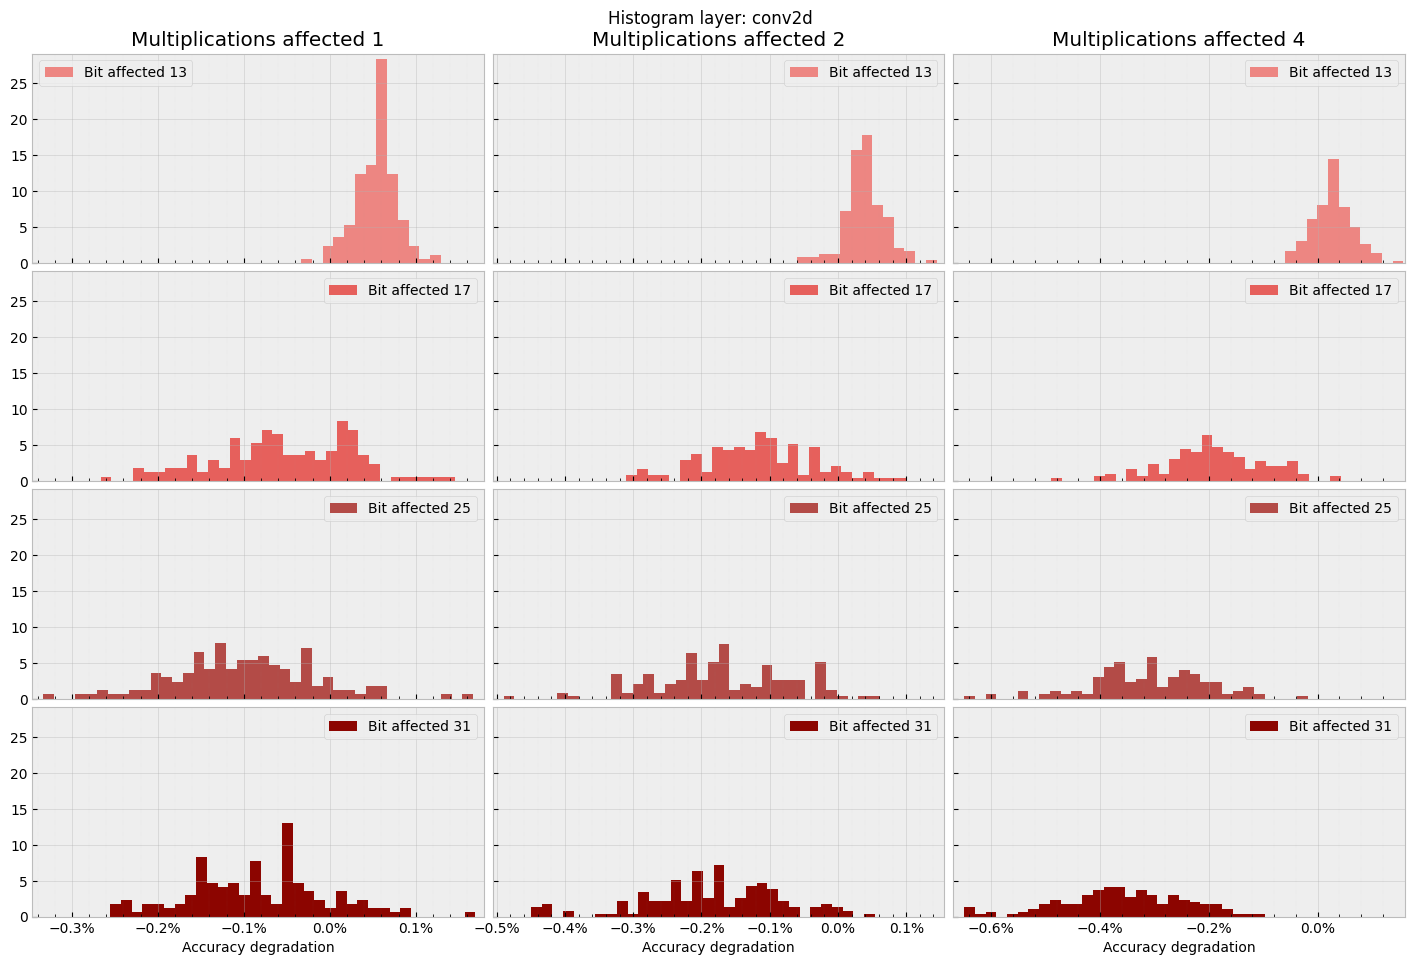

In [12]:
# Accuracy degradation histogram model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d/"
LAYER = "conv2d/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_hist_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

bits = (13, 17, 25, 31)
factor = 0.5
n_rows = len(bits)
n_cols = len(flips)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows * factor))
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Histogram layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
# Controls the *extra* padding of the graphs
fig.tight_layout(h_pad = 0.0, w_pad = 0.0, rect = rect)

# colors_list = ["#82BFED", "#5CAAE6", "#4784B3", "#004F8C", "#004880"] # blue palette
colors_list = ["#ED8682", "#E6605C", "#B34B47", "#8C0500", "#800400"] # red palette

list_xmax = []
list_xmin = []
list_ymax = []
for column, flip in enumerate(flips):
    condition = (df[_flips] == flip) & (df[_bit].isin(bits)) & (df[_layer] == LAYER)
    list_xmax.append(df.loc[condition][_acc_deg].max())
    list_xmin.append(df.loc[condition][_acc_deg].min())

bin_grid_number = 40
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_bit] == bit) & (df[_layer] == LAYER)
        data = pd.to_numeric(df.loc[condition][_acc_deg])*100
        binwidth = (list_xmax[column] - list_xmin[column])*100/bin_grid_number
        [values, bins, patches] = ax[graph_pos].hist(data, 
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth), 
                                                     color = colors_list[row],
                                                     alpha = 1.0,
                                                     density = True)
        list_ymax.append(values.max())
        ax[graph_pos].grid()
        ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
        ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
        x_grid_step = float(f"{(list_xmax[column] - list_xmin[column]) / 5:.{1}g}")*100
        ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(x_grid_step))
        ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax[graph_pos].xaxis.set_major_formatter(ticker.PercentFormatter(decimals = 1))
        ax[graph_pos].set_xlim([list_xmin[column]*100 - binwidth, list_xmax[column]*100 + binwidth])
        if row == 0:
            ax[graph_pos].set_title('Multiplications affected ' + str(flip))
        if column != 0:
            ax[graph_pos].tick_params(axis = 'y', labelleft = False)
        if row < len(bits) - 1:
            ax[graph_pos].tick_params(axis = 'x', labelbottom = False)
        else:
            ax[graph_pos].set_xlabel('Accuracy degradation')
       
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        ax[graph_pos].set_ylim([0, 1.025*np.max(list_ymax)])
        ax[graph_pos].legend(['Bit affected ' + str(bit)])

# Controls the reserved space between the graphs
plt.subplots_adjust(wspace = 0.02, hspace = 0.04)
plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

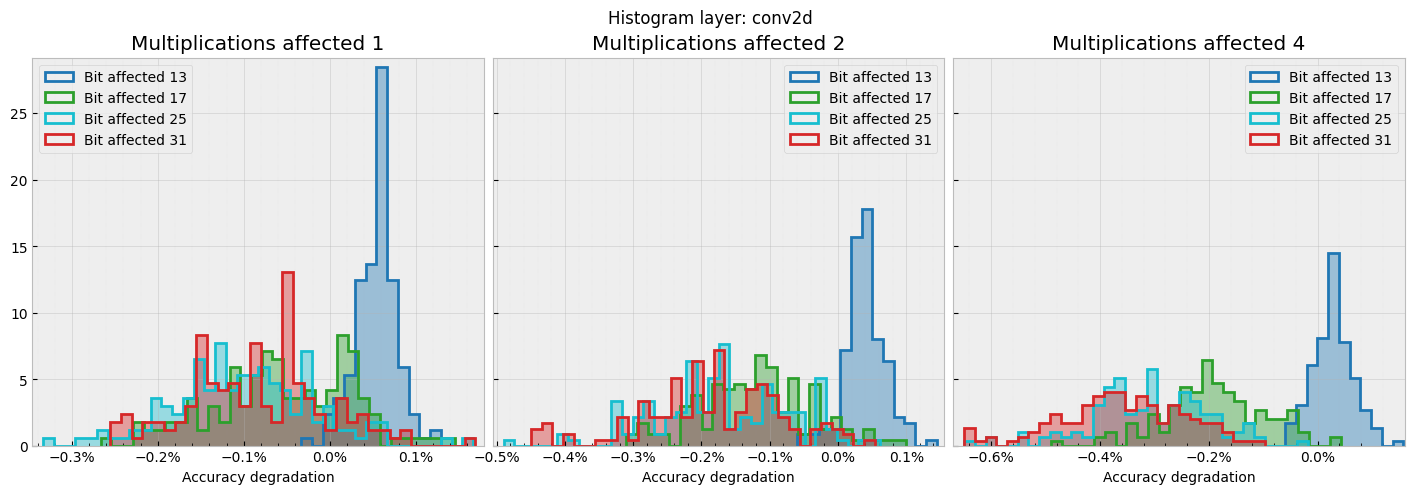

In [13]:
# Accuracy degradation histogram model style 2: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d/"
LAYER = "conv2d/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_hist_conv_s2_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

bits = (13, 17, 25, 31)
n_rows = 1
n_cols = len(flips)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows))
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Histogram layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
# Controls the *extra* padding of the graphs
fig.tight_layout(h_pad = 0.0, w_pad = 0.0, rect = rect)


# colors_list = ["#82BFED", "#5CAAE6", "#4784B3", "#004F8C", "#004880"] # blue palette
# colors_list = ["#82BFED", "#800400", "#800080", "#598000", "#004880"]
colors_list = ['#1f77b4', '#2ca02c', '#17becf', '#d62728']

list_xmax = []
list_xmin = []
list_ymax = []
for column, flip in enumerate(flips):
    condition = (df[_flips] == flip) & (df[_bit].isin(bits)) & (df[_layer] == LAYER)
    list_xmax.append(df.loc[condition][_acc_deg].max())
    list_xmin.append(df.loc[condition][_acc_deg].min())

bin_grid_number = 40
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = column
        condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_bit] == bit) & (df[_layer] == LAYER)
        data = pd.to_numeric(df.loc[condition][_acc_deg])*100
        binwidth = (list_xmax[column] - list_xmin[column])*100/bin_grid_number
        [values, bins, patches] = ax[graph_pos].hist(data, 
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth), 
                                                     color = colors_list[row], 
                                                     alpha = 1.0,
                                                     linewidth = 2.0,
                                                     histtype = 'step',
                                                     density = True)
        
        [values, bins, patches] = ax[graph_pos].hist(data,
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth),
                                                     color = colors_list[row],alpha = 0.4,
                                                    #  histtype = 'stepfilled',
                                                     density = True)
        list_ymax.append(values.max())
        ax[graph_pos].grid()
        ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.5)
        ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
        x_grid_step = float(f"{(list_xmax[column] - list_xmin[column]) / 5:.{1}g}")*100
        ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(x_grid_step))
        ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax[graph_pos].xaxis.set_major_formatter(ticker.PercentFormatter(decimals = 1))
        ax[graph_pos].set_xlim([list_xmin[column]*100 - binwidth, list_xmax[column]*100 + binwidth])
        if row == 0:
            ax[graph_pos].set_title('Multiplications affected ' + str(flip))
        if column != 0:
            ax[graph_pos].tick_params(axis = 'y', labelleft = False)
        if row == len(bits) - 1:
            ax[graph_pos].set_xlabel('Accuracy degradation')

for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = column
        ax[graph_pos].set_ylim([0, 1.025*np.max(list_ymax)])
        ax[graph_pos].legend(['Bit affected ' + str(bit) for bit in bits])

# Controls the reserved space between the graphs
plt.subplots_adjust(wspace = 0.02, hspace = 0.04)
plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

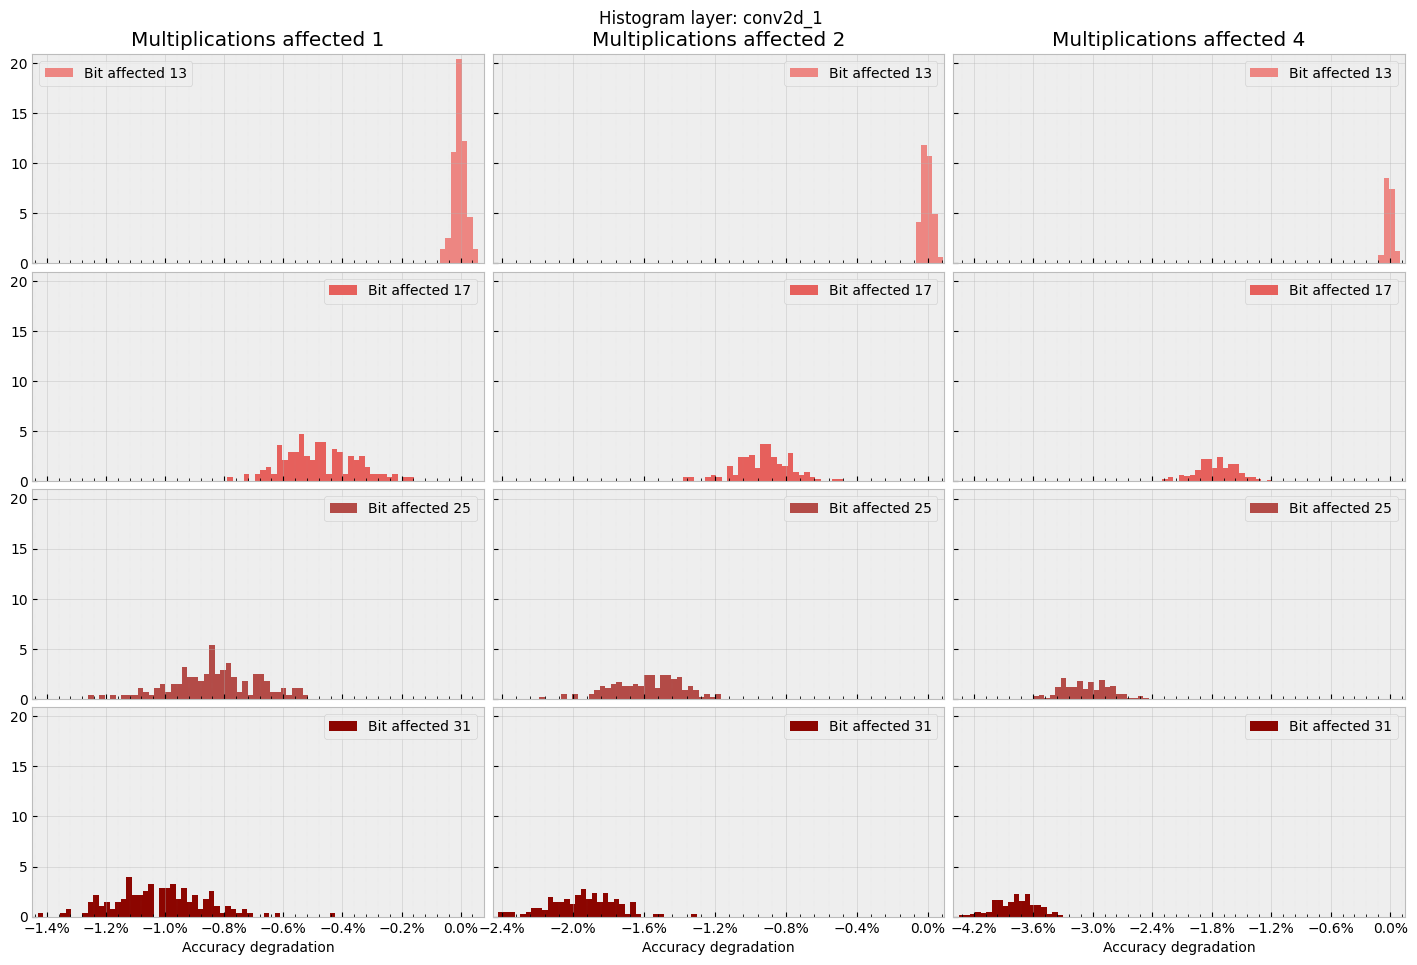

In [14]:
# Accuracy degradation histogram model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_1/"
LAYER = "conv2d_1/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_hist_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

bits = (13, 17, 25, 31)
factor = 0.5
n_rows = len(bits)
n_cols = len(flips)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows * factor))
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Histogram layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
# Controls the *extra* padding of the graphs
fig.tight_layout(h_pad = 0.0, w_pad = 0.0, rect = rect)

# colors_list = ["#82BFED", "#5CAAE6", "#4784B3", "#004F8C", "#004880"] # blue palette
colors_list = ["#ED8682", "#E6605C", "#B34B47", "#8C0500", "#800400"] # red palette

list_xmax = []
list_xmin = []
list_ymax = []
for column, flip in enumerate(flips):
    condition = (df[_flips] == flip) & (df[_bit].isin(bits)) & (df[_layer] == LAYER)
    list_xmax.append(df.loc[condition][_acc_deg].max())
    list_xmin.append(df.loc[condition][_acc_deg].min())

bin_grid_number = 80
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_bit] == bit) & (df[_layer] == LAYER)
        data = pd.to_numeric(df.loc[condition][_acc_deg])*100
        binwidth = (list_xmax[column] - list_xmin[column])*100/bin_grid_number
        [values, bins, patches] = ax[graph_pos].hist(data, 
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth), 
                                                     color = colors_list[row],
                                                     alpha = 1.0,
                                                     density = True)
        list_ymax.append(values.max())
        ax[graph_pos].grid()
        ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
        ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
        x_grid_step = float(f"{(list_xmax[column] - list_xmin[column]) / 7:.{1}g}")*100
        ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(x_grid_step))
        ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax[graph_pos].xaxis.set_major_formatter(ticker.PercentFormatter(decimals = 1))
        ax[graph_pos].set_xlim([list_xmin[column]*100 - binwidth, list_xmax[column]*100 + binwidth])
        if row == 0:
            ax[graph_pos].set_title('Multiplications affected ' + str(flip))
        if column != 0:
            ax[graph_pos].tick_params(axis = 'y', labelleft = False)
        if row < len(bits) - 1:
            ax[graph_pos].tick_params(axis = 'x', labelbottom = False)
        else:
            ax[graph_pos].set_xlabel('Accuracy degradation')
       
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        ax[graph_pos].set_ylim([0, 1.025*np.max(list_ymax)])
        ax[graph_pos].legend(['Bit affected ' + str(bit)])

# Controls the reserved space between the graphs
plt.subplots_adjust(wspace = 0.02, hspace = 0.04)
plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

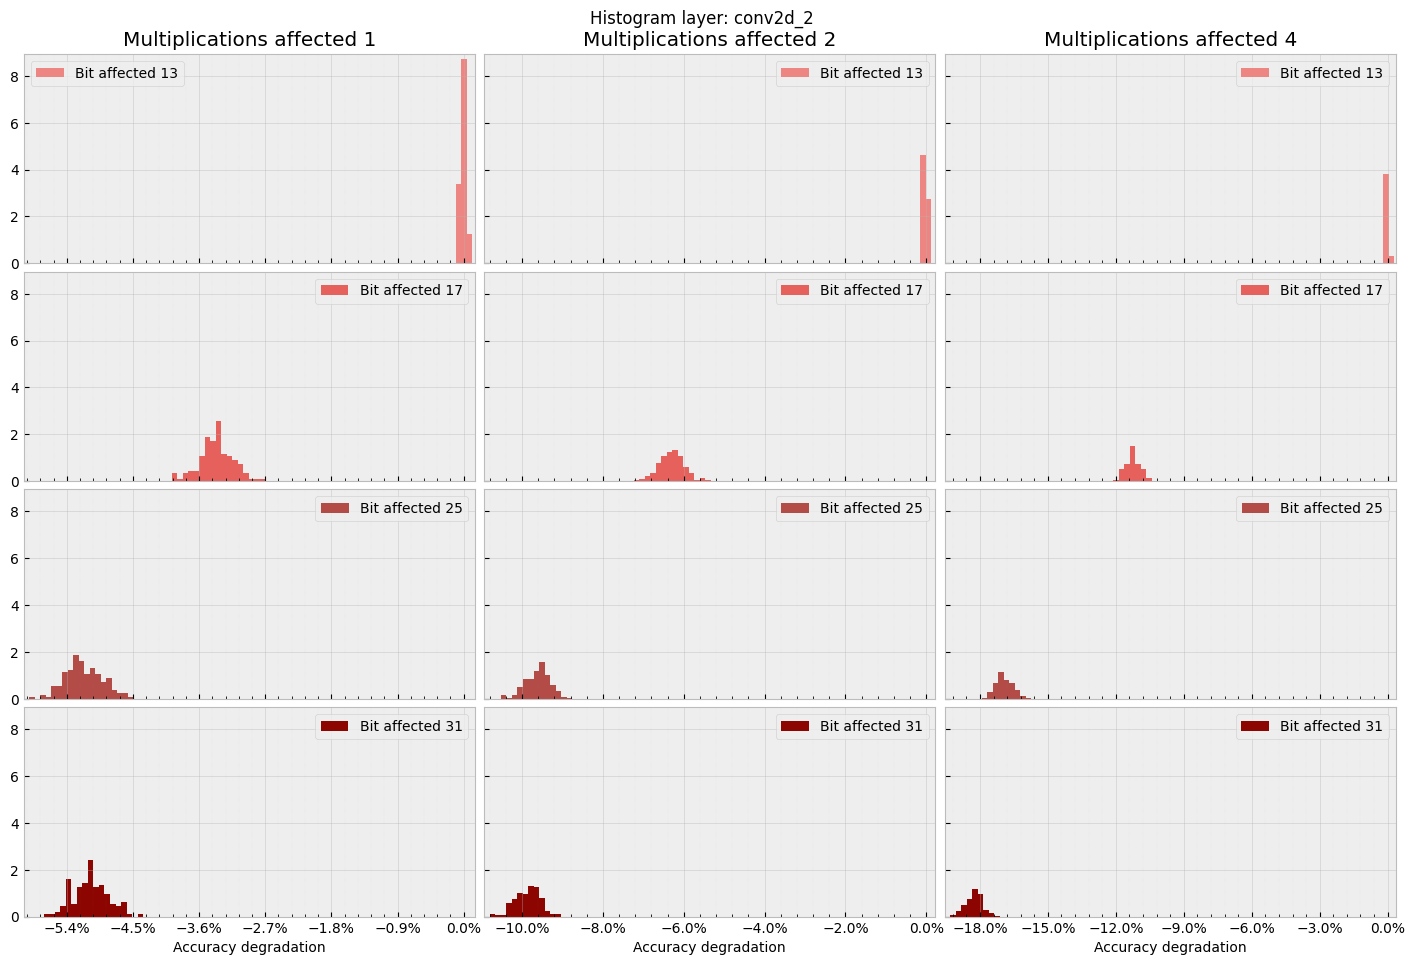

In [15]:
# Accuracy degradation histogram model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_2/"
LAYER = "conv2d_2/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_hist_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

bits = (13, 17, 25, 31)
factor = 0.5
n_rows = len(bits)
n_cols = len(flips)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows * factor))
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Histogram layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
# Controls the *extra* padding of the graphs
fig.tight_layout(h_pad = 0.0, w_pad = 0.0, rect = rect)

# colors_list = ["#82BFED", "#5CAAE6", "#4784B3", "#004F8C", "#004880"] # blue palette
colors_list = ["#ED8682", "#E6605C", "#B34B47", "#8C0500", "#800400"] # red palette

list_xmax = []
list_xmin = []
list_ymax = []
for column, flip in enumerate(flips):
    condition = (df[_flips] == flip) & (df[_bit].isin(bits)) & (df[_layer] == LAYER)
    list_xmax.append(df.loc[condition][_acc_deg].max())
    list_xmin.append(df.loc[condition][_acc_deg].min())

bin_grid_number = 80
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_bit] == bit) & (df[_layer] == LAYER)
        data = pd.to_numeric(df.loc[condition][_acc_deg])*100
        binwidth = (list_xmax[column] - list_xmin[column])*100/bin_grid_number
        [values, bins, patches] = ax[graph_pos].hist(data, 
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth), 
                                                     color = colors_list[row],
                                                     alpha = 1.0,
                                                     density = True)
        list_ymax.append(values.max())
        ax[graph_pos].grid()
        ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
        ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
        x_grid_step = float(f"{(list_xmax[column] - list_xmin[column]) / 7:.{1}g}")*100
        ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(x_grid_step))
        ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax[graph_pos].xaxis.set_major_formatter(ticker.PercentFormatter(decimals = 1))
        ax[graph_pos].set_xlim([list_xmin[column]*100 - binwidth, list_xmax[column]*100 + binwidth])
        if row == 0:
            ax[graph_pos].set_title('Multiplications affected ' + str(flip))
        if column != 0:
            ax[graph_pos].tick_params(axis = 'y', labelleft = False)
        if row < len(bits) - 1:
            ax[graph_pos].tick_params(axis = 'x', labelbottom = False)
        else:
            ax[graph_pos].set_xlabel('Accuracy degradation')
       
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        ax[graph_pos].set_ylim([0, 1.025*np.max(list_ymax)])
        ax[graph_pos].legend(['Bit affected ' + str(bit)])

# Controls the reserved space between the graphs
plt.subplots_adjust(wspace = 0.02, hspace = 0.04)
plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

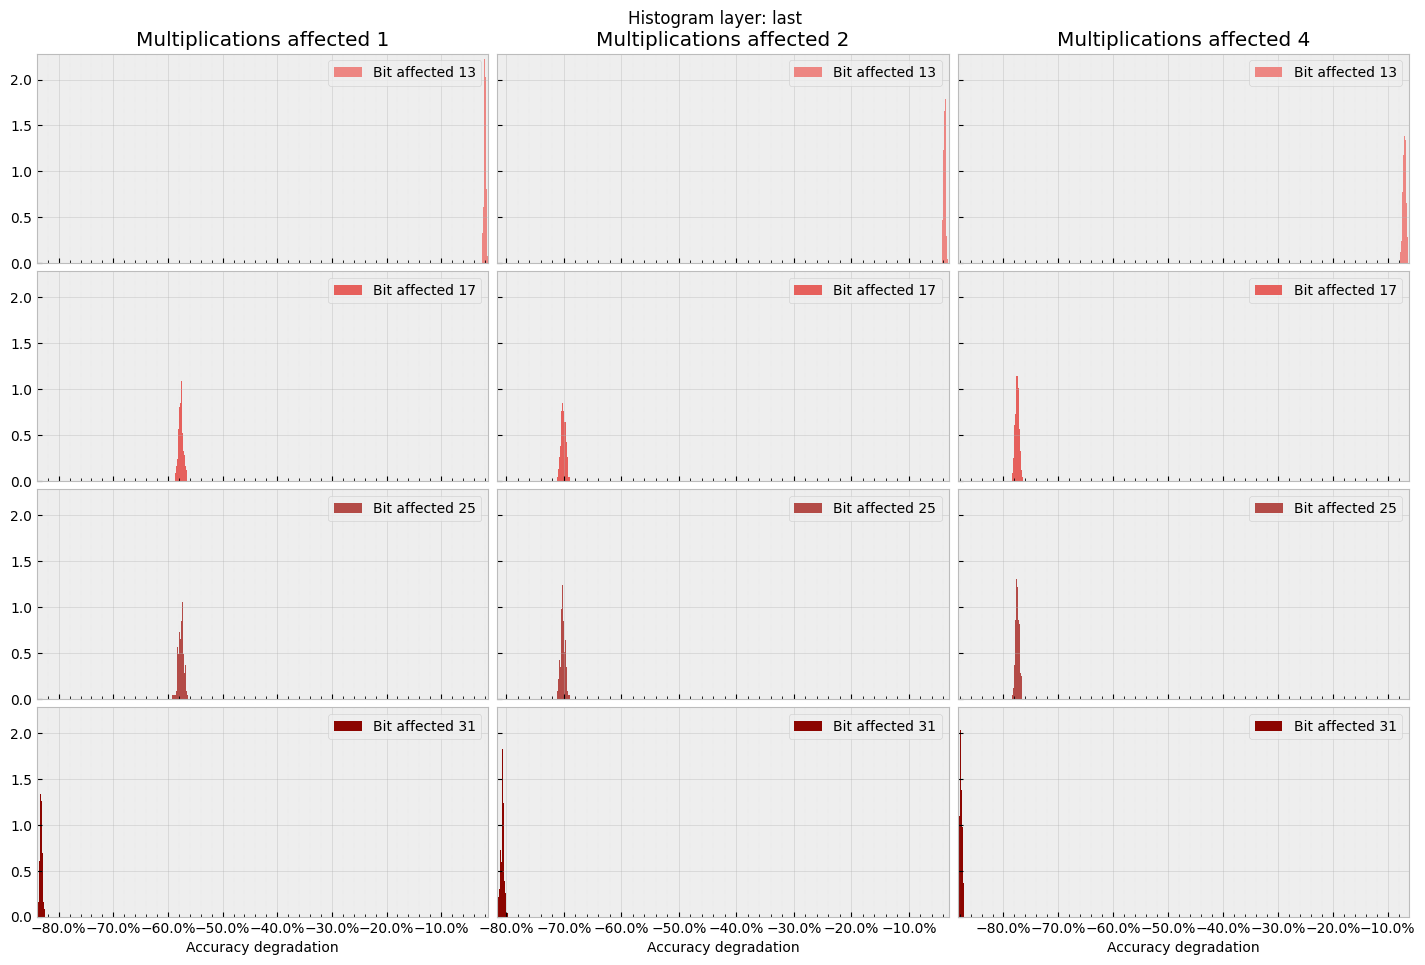

In [16]:
# Accuracy degradation histogram model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "last/"
LAYER = "last/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_hist_conv_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

bits = (13, 17, 25, 31)
factor = 0.5
n_rows = len(bits)
n_cols = len(flips)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows * factor))
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Histogram layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
# Controls the *extra* padding of the graphs
fig.tight_layout(h_pad = 0.0, w_pad = 0.0, rect = rect)

# colors_list = ["#82BFED", "#5CAAE6", "#4784B3", "#004F8C", "#004880"] # blue palette
colors_list = ["#ED8682", "#E6605C", "#B34B47", "#8C0500", "#800400"] # red palette

list_xmax = []
list_xmin = []
list_ymax = []
for column, flip in enumerate(flips):
    condition = (df[_flips] == flip) & (df[_bit].isin(bits)) & (df[_layer] == LAYER)
    list_xmax.append(df.loc[condition][_acc_deg].max())
    list_xmin.append(df.loc[condition][_acc_deg].min())

bin_grid_number = 500
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_bit] == bit) & (df[_layer] == LAYER)
        data = pd.to_numeric(df.loc[condition][_acc_deg])*100
        binwidth = (list_xmax[column] - list_xmin[column])*100/bin_grid_number
        [values, bins, patches] = ax[graph_pos].hist(data, 
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth), 
                                                     color = colors_list[row],
                                                     alpha = 1.0,
                                                     density = True)
        list_ymax.append(values.max())
        ax[graph_pos].grid()
        ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
        ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
        x_grid_step = float(f"{(list_xmax[column] - list_xmin[column]) / 7:.{1}g}")*100
        ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(x_grid_step))
        ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax[graph_pos].xaxis.set_major_formatter(ticker.PercentFormatter(decimals = 1))
        ax[graph_pos].set_xlim([list_xmin[column]*100 - binwidth, list_xmax[column]*100 + binwidth])
        if row == 0:
            ax[graph_pos].set_title('Multiplications affected ' + str(flip))
        if column != 0:
            ax[graph_pos].tick_params(axis = 'y', labelleft = False)
        if row < len(bits) - 1:
            ax[graph_pos].tick_params(axis = 'x', labelbottom = False)
        else:
            ax[graph_pos].set_xlabel('Accuracy degradation')
       
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        ax[graph_pos].set_ylim([0, 1.025*np.max(list_ymax)])
        ax[graph_pos].legend(['Bit affected ' + str(bit)])

# Controls the reserved space between the graphs
plt.subplots_adjust(wspace = 0.02, hspace = 0.04)
plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

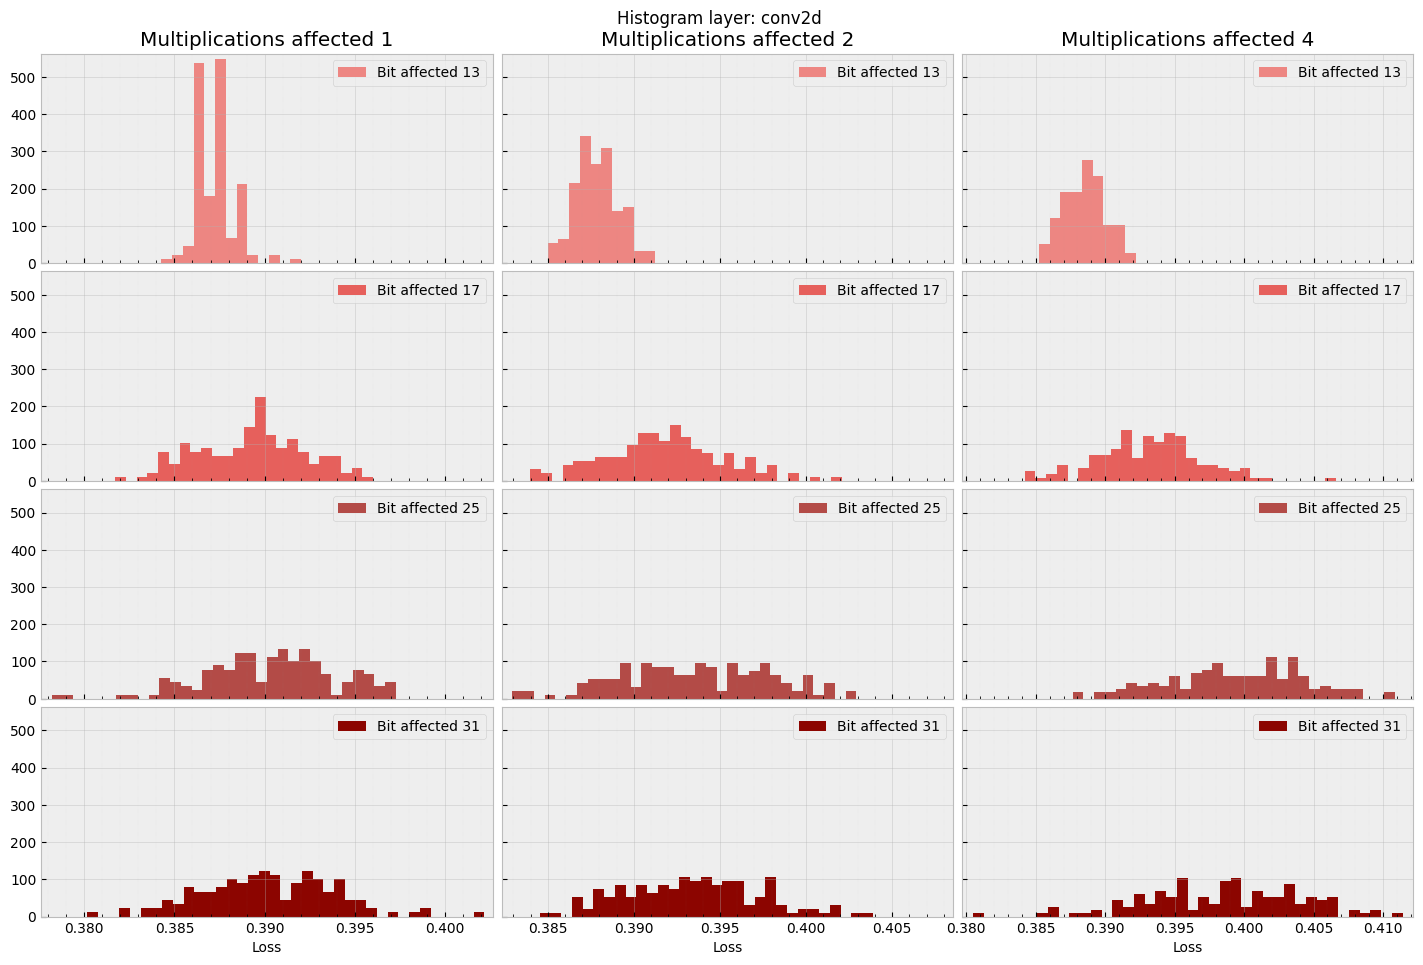

In [17]:
# Loss histogram model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d/"
LAYER = "conv2d/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_convolution_2024-01-27.csv'
save_name = 'delegate_hist_conv_loss_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

bits = (13, 17, 25, 31)
factor = 0.5
n_rows = len(bits)
n_cols = len(flips)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols, base_fig_size * n_rows * factor))
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Histogram layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
# Controls the *extra* padding of the graphs
fig.tight_layout(h_pad = 0.0, w_pad = 0.0, rect = rect)

# colors_list = ["#82BFED", "#5CAAE6", "#4784B3", "#004F8C", "#004880"] # blue palette
colors_list = ["#ED8682", "#E6605C", "#B34B47", "#8C0500", "#800400"] # red palette

list_xmax = []
list_xmin = []
list_ymax = []
for column, flip in enumerate(flips):
    condition = (df[_flips] == flip) & (df[_bit].isin(bits)) & (df[_layer] == LAYER)
    list_xmax.append(df.loc[condition][_loss].max())
    list_xmin.append(df.loc[condition][_loss].min())

bin_grid_number = 40
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_bit] == bit) & (df[_layer] == LAYER)
        data = pd.to_numeric(df.loc[condition][_loss])
        binwidth = (list_xmax[column] - list_xmin[column])/bin_grid_number
        [values, bins, patches] = ax[graph_pos].hist(data, 
                                                     bins = np.arange(min(data), max(data) + binwidth, binwidth), 
                                                     color = colors_list[row],
                                                     alpha = 1.0,
                                                     density = True)
        list_ymax.append(values.max())
        ax[graph_pos].grid()
        ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
        ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
        ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(0.005))
        ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
        ax[graph_pos].set_xlim([list_xmin[column] - binwidth, list_xmax[column] + binwidth])
        if row == 0:
            ax[graph_pos].set_title('Multiplications affected ' + str(flip))
        if column != 0:
            ax[graph_pos].tick_params(axis = 'y', labelleft = False)
        if row < len(bits) - 1:
            ax[graph_pos].tick_params(axis = 'x', labelbottom = False)
        else:
            ax[graph_pos].set_xlabel('Loss')
        
for row, bit in enumerate(bits):
    for column, flip in enumerate(flips):
        graph_pos = (row, column)
        ax[graph_pos].set_ylim([0, 1.025*np.max(list_ymax)])
        ax[graph_pos].legend(['Bit affected ' + str(bit)])

# Controls the reserved space between the graphs
plt.subplots_adjust(wspace = 0.02, hspace = 0.04)
plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

#Weights scripts

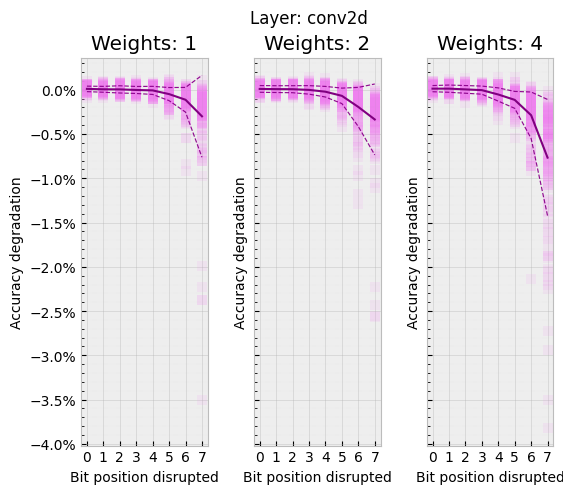

In [42]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d/"
LAYER = "conv2d/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_weights_2024-01-27.csv'
save_name = 'delegate_weight_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
factor = 0.375
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols * factor, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

colors = {"points": "#ee82ee", "line": "#800080", "boundaries": "#8b008b"}

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = colors['points'],
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.1, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Weights: ' + str(flip))
    ax[graph_pos].set_xlabel('Bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = colors['line'], linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

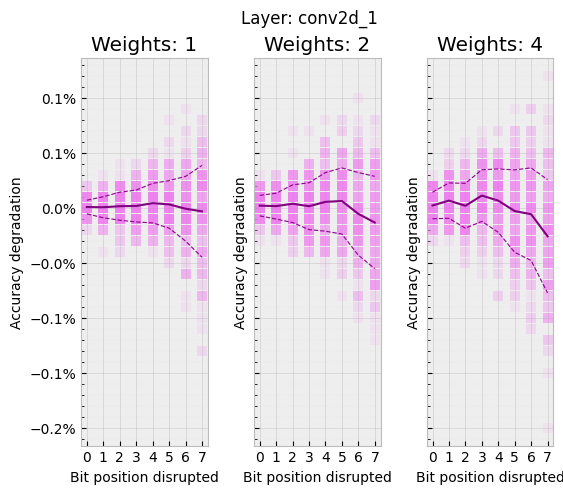

In [43]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_1/"
LAYER = "conv2d_1/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_weights_2024-01-27.csv'
save_name = 'delegate_weight_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
factor = 0.375
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols * factor, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

colors = {"points": "#ee82ee", "line": "#800080", "boundaries": "#8b008b"}

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = colors['points'],
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.1, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Weights: ' + str(flip))
    ax[graph_pos].set_xlabel('Bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = colors['line'], linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

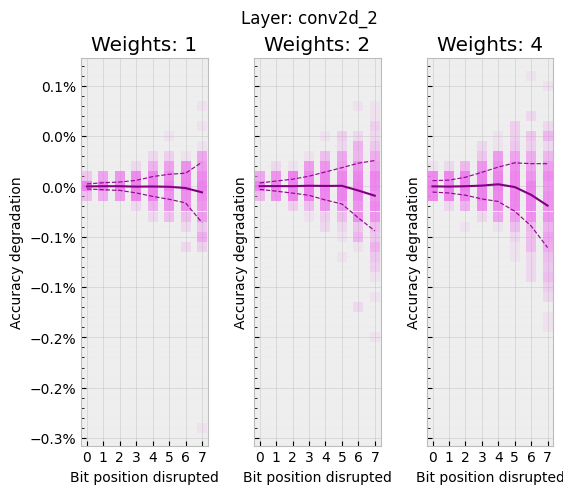

In [44]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "conv2d_2/"
LAYER = "conv2d_2/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_weights_2024-01-27.csv'
save_name = 'delegate_weight_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
factor = 0.375
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols * factor, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

colors = {"points": "#ee82ee", "line": "#800080", "boundaries": "#8b008b"}

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = colors['points'],
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.1, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Weights: ' + str(flip))
    ax[graph_pos].set_xlabel('Bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = colors['line'], linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()

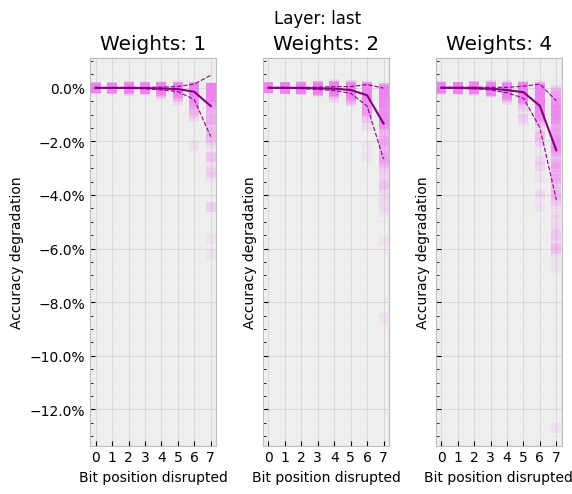

In [45]:
# Accuracy degradation model: 'delegate_16-50-58_convolution_2024-01-27.csv' layer: "last/"
LAYER = "last/"
backend = DelegatesUtils.Backend.normal
[save_path, base_fig_size, extension] = DelegatesUtils.pyplot_backend_change(backend)

# Constants and data loading
DATA_PATH = OUTPUTS_DIR + 'delegate_16-50-58_weights_2024-01-27.csv'
save_name = 'delegate_weight_acc_degradation_' + LAYER[:-1] + extension
df = pd.read_csv(DATA_PATH)

(_layer, _flips, _bit, _acc_deg, _loss) = DelegatesUtils.mask_fields()
flips = np.unique(df[_flips])
flips = flips[~np.isnan(flips)].astype(int)

# Graphs definition
factor = 0.375
n_cols = 3
n_rows = np.ceil(len(flips) / n_cols).astype(int)
fig, ax = plt.subplots(n_rows, n_cols, figsize = (base_fig_size * n_cols * factor, base_fig_size * n_rows), sharey = True)
if backend == DelegatesUtils.Backend.normal:
    rect = [0, 0, 1, 0.99]
    fig.suptitle(f"Layer: {LAYER[:-1]}")
else:
    rect = [0, 0, 1, 1]
fig.tight_layout(h_pad = 3.5, w_pad = 1.75, rect = rect)

decimals = [1, 1, 1, 1]

""" Best colors:
    Points          Limits          Line
    violet          darkmagenta     purple
    lightcoral      darkred         maroon
    #82BFED         #004F8C         #004880"""

colors = {"points": "#ee82ee", "line": "#800080", "boundaries": "#8b008b"}

for i, flip in enumerate(flips):
    graph_pos = DelegatesUtils.convert_position(i, n_rows = n_rows, n_cols = n_cols)
    ax[graph_pos].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i]))
    condition = (df[_layer].notna()) & (df[_flips] == flip) & (df[_layer] == LAYER)
    ax[graph_pos].plot(df.loc[condition][_bit], 
                       pd.to_numeric(df.loc[condition][_acc_deg])*100, 
                       color = colors['points'],
                       linewidth = 0, 
                       marker = 's', 
                       alpha = 0.1, 
                       markersize = 7, 
                       markeredgewidth = 0)
    ax[graph_pos].set_title('Weights: ' + str(flip))
    ax[graph_pos].set_xlabel('Bit position disrupted')
    ax[graph_pos].set_ylabel('Accuracy degradation')
    ax[graph_pos].xaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax[graph_pos].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    # ax[graph_pos].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i]))
    # ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minor_locators[i])) 
    ax[graph_pos].yaxis.set_minor_locator(ticker.AutoMinorLocator()) 
    ax[graph_pos].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[graph_pos].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)

    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition][_bit])
    for j in bits_array:
        new_condition = condition & (df[_bit] == j)
        averages.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).mean())
        stds.append(pd.to_numeric(df.loc[new_condition][_acc_deg]).std())   
    averages = np.array(averages)
    ax[graph_pos].plot(bits_array, averages*100, alpha = 1.00, color = colors['line'], linewidth = 1.5)
    ax[graph_pos].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)
    ax[graph_pos].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = colors['boundaries'], linewidth = 0.85)

plt.savefig(save_path + save_name, bbox_inches = 'tight')
plt.show()
plt.close()